# Classification: Logistic Regression: Example

## Simulation of credit data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn.linear_model as lm

num_customers = 2000
salary_mean = 24000 # annual after tax
salary_sd = 3000

monthly_mean = 1500 # monthly outgoings
monthly_sd = 300

p_low_default = 0.65 # probability of default on loan for low income people
p_high_default = 0.05

# Start Data Frame with random distribution of values centred as above
credit_data = pd.DataFrame({
    "CustomerID": range(1, num_customers + 1),
    "Income": np.random.normal(salary_mean, salary_sd, num_customers),
    "Monthly": np.random.normal(monthly_mean, monthly_sd, num_customers),
    "Default": [1] * num_customers
})

# Create Excess column (hidden variable which is real correlate of defaults)
credit_data["Excess"] = credit_data["Income"]/12.0 - credit_data["Monthly"]

# Generate Defaults from Excess, with a low income group and a high income group

# select low income
low_income = (credit_data["Excess"] < monthly_sd)
num_high, num_low = low_income.value_counts()

# low income have a p_low_default chance of default
credit_data.loc[low_income, "Default"] = np.random.choice([1, 0], num_low , p=[p_low_default, 1 - p_low_default])

# high income have a p_high_default chance of default
credit_data.loc[~low_income , "Default"] = np.random.choice([1, 0], num_high, p=[p_high_default, 1 - p_high_default])


# discretize everything to make data more readable and imprecise 
credit_data = credit_data.astype(int)

credit_data.head()

,CustomerID,Income,Monthly,Default,Excess
0,1,22812,1371,0,529
1,2,27441,1554,0,732
2,3,17336,1002,0,442
3,4,21698,1280,0,527
4,5,26703,2181,0,43


### let's see the generated data

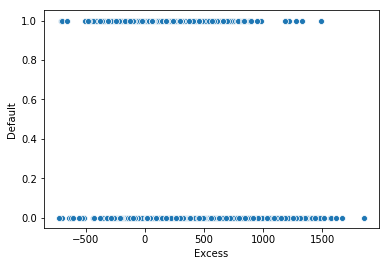

In [2]:
sns.scatterplot(y="Default", x="Excess", data=credit_data)

### Logistic Regression

In [3]:
X = credit_data[["Excess"]]
y = credit_data[["Default"]].values.ravel()

clf = lm.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

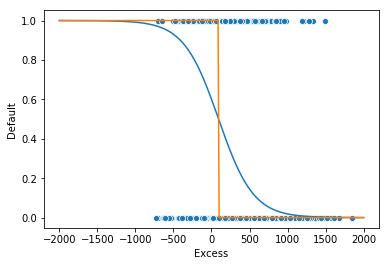

In [4]:
X = np.linspace(-2000, 2000, 300).reshape(-1,1)
plot = sns.scatterplot(y="Default", x="Excess", data=credit_data)
plot = sns.lineplot(X.ravel(), clf.predict_proba(X)[:, 1].ravel())  # probability curve
plot = sns.lineplot(X.ravel(), clf.predict(X).ravel())  # prediction line

In [5]:
my_excess_income = 200

p_settle, p_default = clf.predict_proba([[my_excess_income]])[0]

print(p_default)

0.38581696220521494


* Vertical axis is P(Default | Execess)
* Probability goes from near 1 at Excess ~= -500  to near 0 at Excess ~= 1500
* Model predicts Default when Excess < aprox. 100
* Model uses P(Default | Excess) = 0.5 to predict {0, 1}
* Most observations Default at  Excess < -300
* Most observations NoDefault at Excess > 1300